## 1. Define the Problem

Predict the tendency of mental health status through a survey

## 2. Gather the data

In [55]:
#import library
import pandas as pd

In [56]:
#import the data
Location2016="C:/Users/Constance Lim/OneDrive/Learning/Learning/IOD/Project/Capstone/1. Data/1. OSMI_survey_2016/survey.csv"
data2016=pd.read_csv(Location2016)

In [57]:
#qucick look at the data
data2016.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [58]:
#quick look at the columns
data2016.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

## 3. Pre-processing the data

In [59]:
data2016.shape

(1259, 27)

### (a) Check null value

In [60]:
#check null values
data2016.isnull().sum() 

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [61]:
# understand the defination of columns with null values
#state                         515
#self_employed                  18
#work_interfere                264
#comments                     1095

In [62]:
#check the unique value
data2016.state.value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
OR     29
IL     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
MO     12
GA     12
WI     12
UT     11
CO      9
MD      8
AL      8
AZ      7
NJ      6
OK      6
SC      5
KY      5
DC      4
IA      4
CT      4
KS      3
NH      3
VT      3
NV      3
SD      3
NE      2
NM      2
WY      2
RI      1
LA      1
WV      1
ID      1
ME      1
MS      1
Name: state, dtype: int64

In [63]:
data2016.self_employed.value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [64]:
#work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
data2016.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [65]:
data2016.comments.value_counts()

* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [66]:
# drop the missing records
data2016.dropna(subset = ["self_employed"], inplace=True)

# drop "state","work_interfere","comments" columns
data2016.drop(columns=["state","work_interfere","comments"],inplace=True,axis=1)


In [67]:
data2016.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [68]:
data2016.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

### (b) Drop meaningless column

In [69]:
data2016.head(5)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,male,United States,Yes,Yes,No,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,2014-08-27 11:35:08,36,Male,France,Yes,Yes,No,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,2014-08-27 11:35:12,29,Male,United States,No,Yes,Yes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,male,United States,Yes,No,No,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,No,No,Yes,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [70]:
# drop "Timestamp" columns
data2016.drop(columns=['Timestamp', 'Country'],inplace=True)


### (c) Check data type

In [71]:
# check the data type
data2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 18 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1241 non-null   int64 
 1   Gender                     1241 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1241 non-null   object
 4   treatment                  1241 non-null   object
 5   no_employees               1241 non-null   object
 6   remote_work                1241 non-null   object
 7   tech_company               1241 non-null   object
 8   benefits                   1241 non-null   object
 9   care_options               1241 non-null   object
 10  wellness_program           1241 non-null   object
 11  seek_help                  1241 non-null   object
 12  anonymity                  1241 non-null   object
 13  leave                      1241 non-null   object
 14  mental_

In [72]:
data2016.head(5)

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,Yes,Yes,No,1-5,Yes,Yes,Yes,Not sure,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,Yes,Yes,No,6-25,Yes,Yes,No,No,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,No,Yes,Yes,100-500,No,Yes,Yes,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,Yes,No,No,1-5,Yes,Yes,No,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,No,No,Yes,26-100,Yes,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


### (d) convert continuous data to integer

#### (i) Age

In [73]:
# check the unique value of Age
data2016["Age"].value_counts()

 29             83
 32             80
 26             75
 27             70
 33             69
 28             68
 34             65
 31             64
 30             63
 25             61
 35             54
 23             49
 24             46
 37             42
 38             39
 36             36
 40             33
 39             32
 43             28
 41             21
 22             21
 42             18
 21             16
 45             12
 46             12
 44             10
 19              9
 18              7
 50              6
 48              6
 20              6
 51              5
 49              4
 56              4
 57              3
 55              3
 54              3
 60              2
 47              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [74]:
#remove not reasonable value and correct error


#define list of values
age_to_remove=["99999999999","-1726","329","-1","5"]

#drop any rows that have value in the age_to_remove list in the "Age" column
data2016 = data2016[data2016.Age.isin(age_to_remove) == False]


#view resulting DataFrame
data2016["Age"].value_counts()

 29    83
 32    80
 26    75
 27    70
 33    69
 28    68
 34    65
 31    64
 30    63
 25    61
 35    54
 23    49
 24    46
 37    42
 38    39
 36    36
 40    33
 39    32
 43    28
 41    21
 22    21
 42    18
 21    16
 45    12
 46    12
 44    10
 19     9
 18     7
 20     6
 48     6
 50     6
 51     5
 49     4
 56     4
 55     3
 57     3
 54     3
 60     2
 47     2
 11     1
-29     1
 72     1
 53     1
 58     1
 61     1
 62     1
 65     1
 8      1
Name: Age, dtype: int64

In [75]:
# turn "age" column to integer
data2016["Age"].astype(int)

18      46
19      36
20      29
21      31
22      46
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1236, dtype: int32

In [76]:
data2016["Age"]=abs(data2016["Age"])

In [77]:
#view resulting DataFrame
data2016["Age"].value_counts()

29    84
32    80
26    75
27    70
33    69
28    68
34    65
31    64
30    63
25    61
35    54
23    49
24    46
37    42
38    39
36    36
40    33
39    32
43    28
22    21
41    21
42    18
21    16
45    12
46    12
44    10
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
54     3
55     3
57     3
47     2
60     2
11     1
72     1
65     1
53     1
58     1
61     1
62     1
8      1
Name: Age, dtype: int64

#### (ii) no_employees

In [78]:
data2016.reset_index(drop=True, inplace=True)

In [79]:
data2016['no_employees'].replace(to_replace =['More than 1000'], value =['>1000'] , inplace = True)

In [80]:
data2016['no_employees'].value_counts()

6-25        283
26-100      283
>1000       281
100-500     172
1-5         158
500-1000     59
Name: no_employees, dtype: int64

In [81]:
convert={"6-25":25,"26-100":100,">1000":1000,"100-500":500,"1-5":5,"500-1000":1000}

data2016['no_employees']=data2016['no_employees'].map(convert,data2016['no_employees'])

In [82]:
data2016['no_employees'].value_counts()

1000    340
100     283
25      283
500     172
5       158
Name: no_employees, dtype: int64

### (e) convert categorical data to dummy

In [83]:
#print again the column 
data2016.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

#### (i) Gender

In [84]:
data2016["Gender"] = data2016["Gender"].str.lower().str.strip()
data2016["Gender"].value_counts()

male                                              810
female                                            180
m                                                 148
f                                                  53
make                                                4
woman                                               4
cis male                                            3
female (trans)                                      2
man                                                 2
femail                                              1
trans woman                                         1
male (cis)                                          1
nah                                                 1
cis man                                             1
female (cis)                                        1
genderqueer                                         1
msle                                                1
cis-female/femme                                    1
male leaning androgynous    

In [85]:
f=["female","f","woman","female (trans)","cis-female/femme","cis female","trans-female","female (cis)",
   "queer/she/they","femail","femake","trans woman"]

m=["male","m","make","cis male","man","maile","male leaning androgynous","cis man","something kinda male?"
,"ostensibly male, unsure what that really means","guy (-ish) ^_^","msle","mail","male (cis)","male-ish","malr","mal"]


In [86]:
# Male and female
data2016["Gender"] = data2016["Gender"].replace(m,'m')
data2016["Gender"] = data2016["Gender"].replace(f,'f')

In [87]:
data2016["Gender"].value_counts()

m                     979
f                     247
fluid                   1
nah                     1
enby                    1
a little about you      1
non-binary              1
queer                   1
neuter                  1
genderqueer             1
androgyne               1
agender                 1
Name: Gender, dtype: int64

In [88]:
others=list(data2016["Gender"].value_counts().index[2:])
data2016["Gender"]=data2016["Gender"].replace(others,"others")

In [89]:
others

['fluid',
 'nah',
 'enby',
 'a little about you',
 'non-binary',
 'queer',
 'neuter',
 'genderqueer',
 'androgyne',
 'agender']

In [90]:
data2016["Gender"].value_counts()

m         979
f         247
others     10
Name: Gender, dtype: int64

In [91]:
#understand the unique value of each column
columns=data2016.columns

for col in columns:
    
    print("^Column name:",col)
    print(data2016[col].value_counts())

^Column name: Age
29    84
32    80
26    75
27    70
33    69
28    68
34    65
31    64
30    63
25    61
35    54
23    49
24    46
37    42
38    39
36    36
40    33
39    32
43    28
22    21
41    21
42    18
21    16
45    12
46    12
44    10
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
54     3
55     3
57     3
47     2
60     2
11     1
72     1
65     1
53     1
58     1
61     1
62     1
8      1
Name: Age, dtype: int64
^Column name: Gender
m         979
f         247
others     10
Name: Gender, dtype: int64
^Column name: self_employed
No     1092
Yes     144
Name: self_employed, dtype: int64
^Column name: family_history
No     753
Yes    483
Name: family_history, dtype: int64
^Column name: treatment
Yes    624
No     612
Name: treatment, dtype: int64
^Column name: no_employees
1000    340
100     283
25      283
500     172
5       158
Name: no_employees, dtype: int64
^Column name: remote_work
No     868
Yes    368
Name: remote_work, dtype: int

#### Clean the "leave" column

In [92]:
data2016.leave.value_counts()

Don't know            553
Somewhat easy         262
Very easy             204
Somewhat difficult    121
Very difficult         96
Name: leave, dtype: int64

In [93]:
convertLeave={"Don't know":"Don't know","Somewhat easy":"easy","Very easy":"easy","Somewhat difficult":"difficult","Very difficult":"difficult"}
data2016["leave"]=data2016.leave.map(convertLeave)

In [94]:
data2016.leave.value_counts()

Don't know    553
easy          466
difficult     217
Name: leave, dtype: int64

In [95]:
data2016=pd.get_dummies(data2016.drop(['Age','no_employees'],axis=1),drop_first=True)

In [96]:
data2016.head()

,Gender_m,Gender_others,self_employed_Yes,family_history_Yes,treatment_Yes,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,1,0,1,1,0,1,1,0,1,1,...,1,0,1,1,0,0,1,0,1,1
1,1,0,1,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
3,1,0,1,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,1,1,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0


## 4. Create model

In [97]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from  sklearn.ensemble import RandomForestClassifier 

In [98]:
#assign X
X=data2016.drop(columns=['treatment_Yes'])

#assign y
y=data2016['treatment_Yes']


In [99]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [100]:
y.shape

(1236,)

In [101]:
#logistic regression
logmodel = LogisticRegression() #create

In [102]:
#get the baseline score
logmodel.fit(X,y)
logmodel.score(X,y)

0.7305825242718447

In [103]:
# Fit Model
logmodel.fit(X_train,y_train)

LogisticRegression()

In [104]:
logmodel.score(X_train,y_train)

0.7358299595141701

In [105]:
y_test = logmodel.predict(X_test)

In [106]:
# Score model on testing set.
logmodel.score(X_test,y_test)

1.0

## 5. Evaluation

In [111]:
# Get predictions
preds = logmodel.predict(X_test)
# Save confusion matrix values
tn_logmodel, fp_logmodel, fn_logmodel, tp_logmodel = confusion_matrix(y_test, preds).ravel()

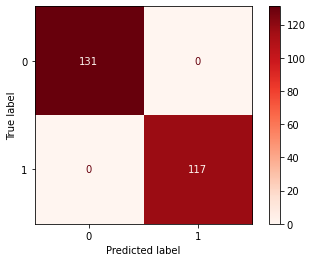

In [112]:
# View confusion matrix
plot_confusion_matrix(logmodel,X_test, y_test,cmap='Reds', values_format='d');

In [113]:
print("True Negatives :", tn_logmodel)
print("True Positives :", tp_logmodel)
print("false Negatives :", fn_logmodel)
print("false Positives :", fp_logmodel)

True Negatives : 131
True Positives : 117
false Negatives : 0
false Positives : 0


In [115]:
# Calculate the specificity

spec = tn_logmodel / (tn_logmodel + fp_logmodel)

print("specificity =",round(spec,2))

specificity = 1.0


In [117]:
# Calculate the accuracy

acc = (tp_logmodel+tn_logmodel)/ (tn_logmodel+tp_logmodel+fn_logmodel+fp_logmodel)

print("accuracy =",round(acc,2))

accuracy = 1.0


## 6. Answer the Problem

The model prediction result is quite accurate to predict the mental status